# Brain Stroke

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

### Attribute Information

1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) ever-married: "No" or "Yes"
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
8) avgglucoselevel: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Data Source

https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from pandas.plotting import scatter_matrix
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 

In [2]:
dataset = pd.read_csv('full_data.csv')
dataset = dataset.drop('gender', axis=1)
print(dataset.head())

    age  hypertension  heart_disease ever_married      work_type  \
0  67.0             0              1          Yes        Private   
1  80.0             0              1          Yes        Private   
2  49.0             0              0          Yes        Private   
3  79.0             1              0          Yes  Self-employed   
4  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [3]:
dataset.shape

(4981, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   ever_married       4981 non-null   object 
 4   work_type          4981 non-null   object 
 5   Residence_type     4981 non-null   object 
 6   avg_glucose_level  4981 non-null   float64
 7   bmi                4981 non-null   float64
 8   smoking_status     4981 non-null   object 
 9   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 389.3+ KB


In [7]:
label_encoder = preprocessing.LabelEncoder()

dataset["ever_married"] = label_encoder.fit_transform(dataset["ever_married"])
dataset["work_type"] = label_encoder.fit_transform(dataset["work_type"])
dataset["Residence_type"] = label_encoder.fit_transform(dataset["Residence_type"])
dataset["smoking_status"] = label_encoder.fit_transform(dataset["smoking_status"])

dataset.astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   ever_married       4981 non-null   int64  
 4   work_type          4981 non-null   int64  
 5   Residence_type     4981 non-null   int64  
 6   avg_glucose_level  4981 non-null   float64
 7   bmi                4981 non-null   float64
 8   smoking_status     4981 non-null   int64  
 9   stroke             4981 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 389.3 KB


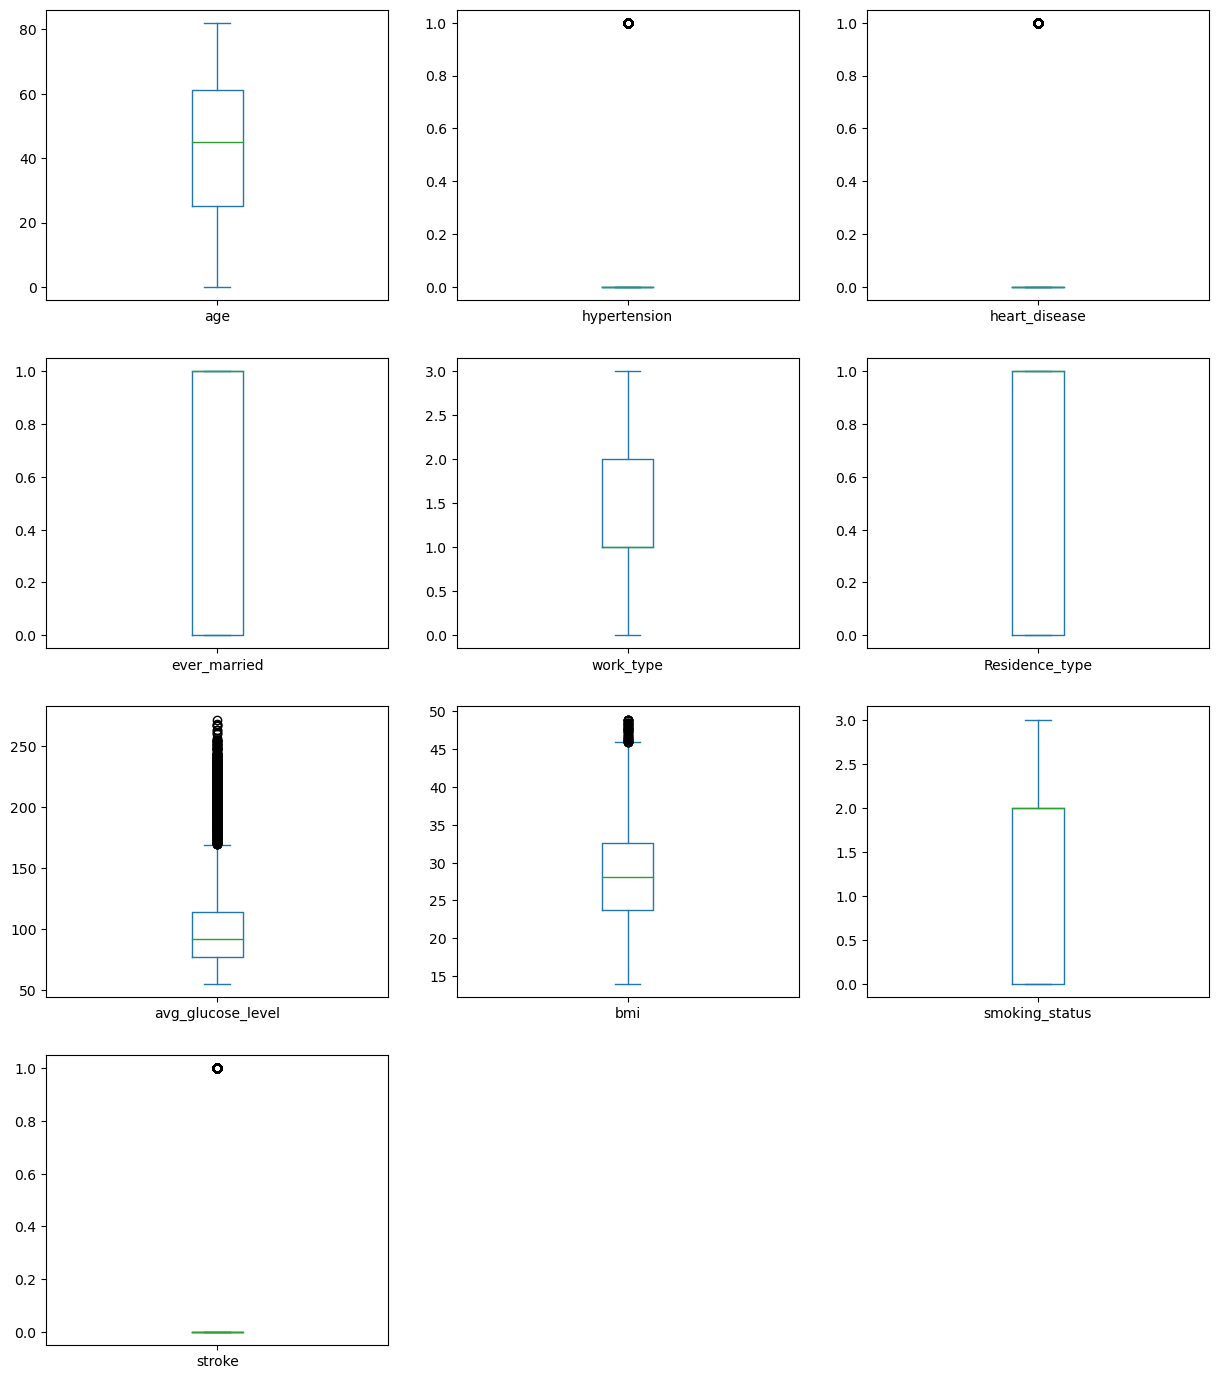

In [6]:
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [15, 50]
dataset.plot(kind='box', subplots=True, layout=(11,3), sharex=False, sharey=False)
plt.show()

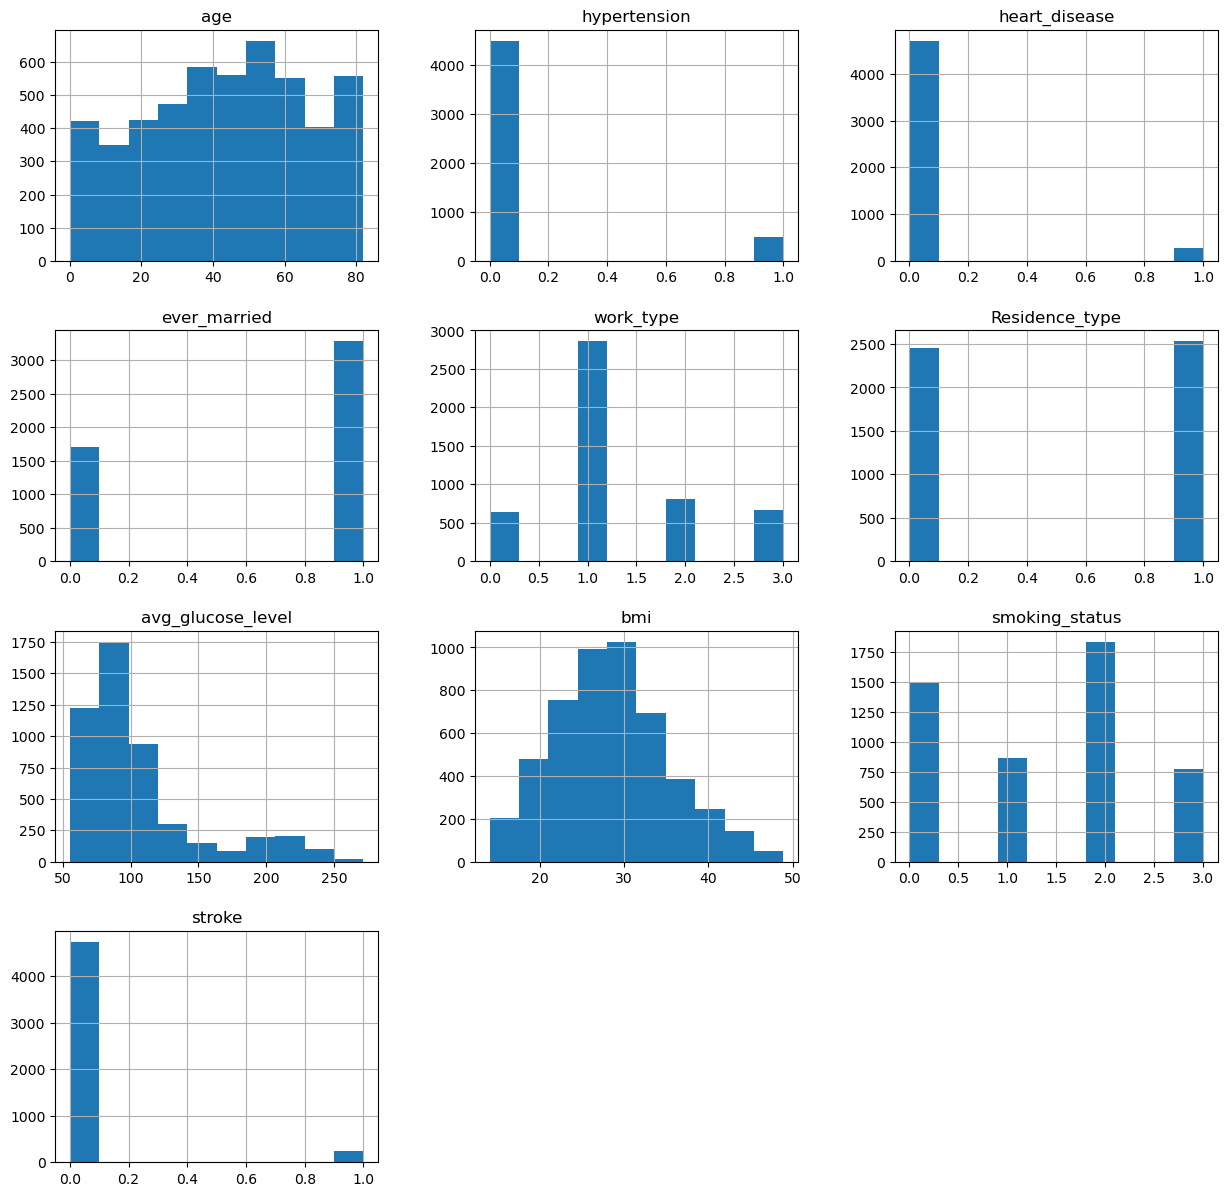

In [8]:
plt.rcParams['figure.figsize'] = [15, 15]
dataset.hist()
plt.show()

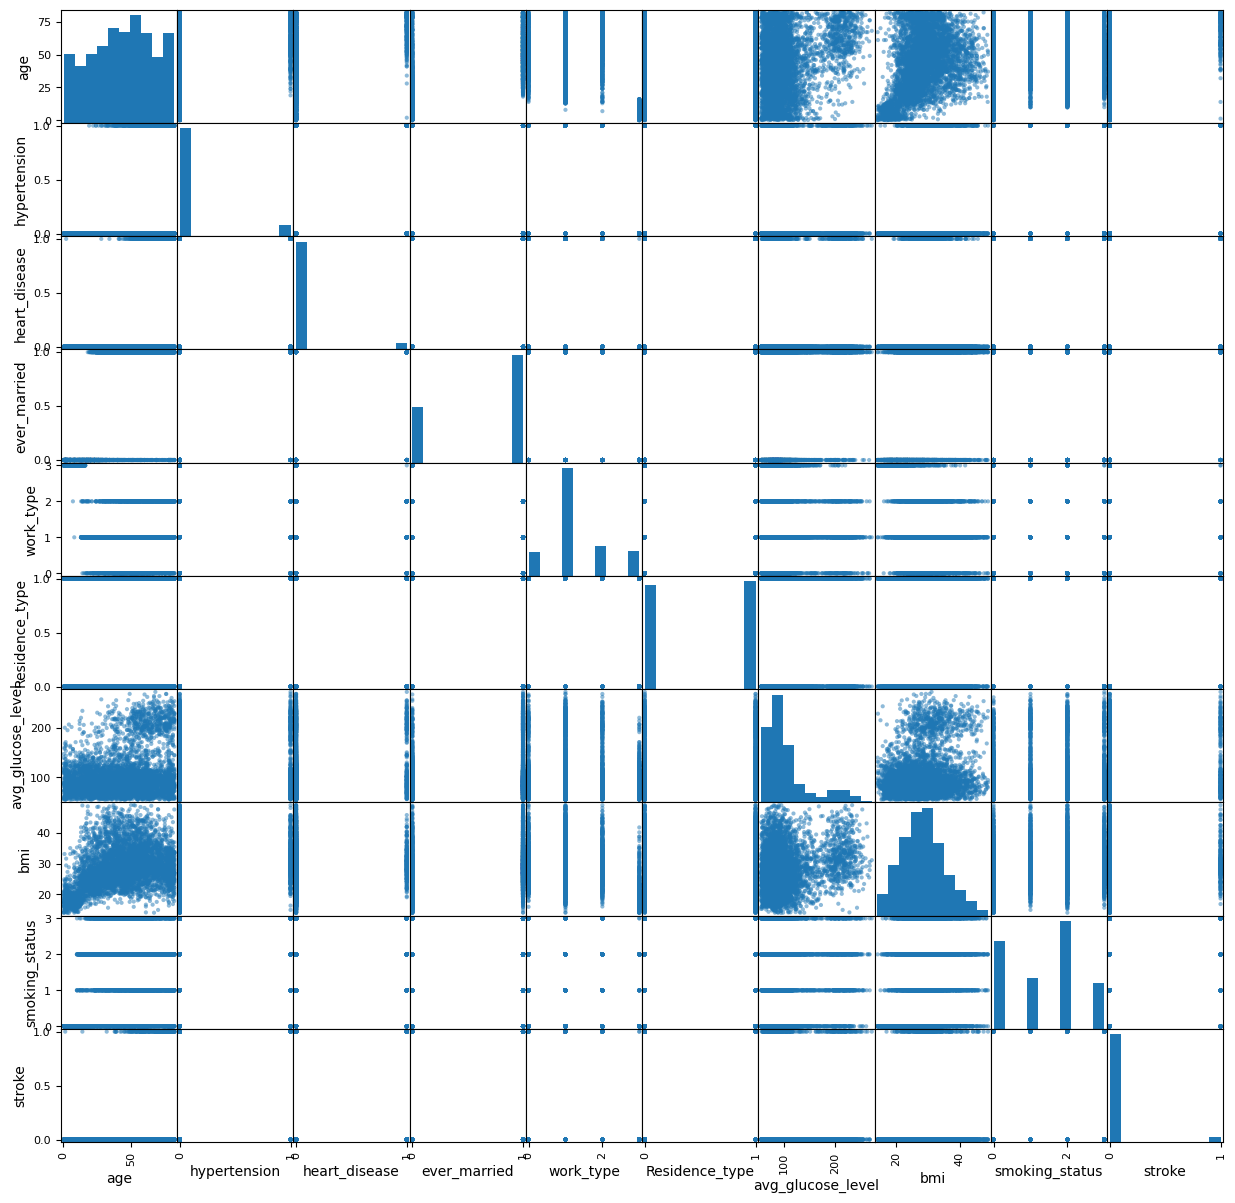

In [9]:
scatter_matrix(dataset)
plt.show()

In [17]:
X_train = dataset.drop('stroke', axis=1)
y_train = dataset['stroke']
X_train.astype(float)
y_train.astype(float)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4976    0.0
4977    0.0
4978    0.0
4979    0.0
4980    0.0
Name: stroke, Length: 4981, dtype: float64

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950010 (0.001080)
LDA: 0.943382 (0.007300)
KNN: 0.942983 (0.004137)
CART: 0.905443 (0.008464)
RF: 0.949006 (0.001612)
NB: 0.860266 (0.014681)
SVM: 0.950211 (0.000799)


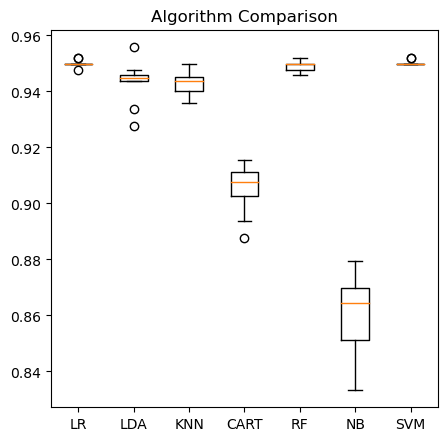

In [19]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [20]:
datatest = pd.read_csv('full_filled_stroke_data (1).csv')
datatest = datatest.drop('gender', axis=1)
print(dataset.head())

    age  hypertension  heart_disease  ever_married  work_type  Residence_type  \
0  67.0             0              1             1          1               1   
1  80.0             0              1             1          1               0   
2  49.0             0              0             1          1               1   
3  79.0             1              0             1          2               0   
4  81.0             0              0             1          1               1   

   avg_glucose_level   bmi  smoking_status  stroke  
0             228.69  36.6               1       1  
1             105.92  32.5               2       1  
2             171.23  34.4               3       1  
3             174.12  24.0               2       1  
4             186.21  29.0               1       1  


In [21]:
X_test = dataset.drop('stroke', axis=1)
y_test = dataset['stroke']
X_test.astype(float)
y_test.astype(float)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4976    0.0
4977    0.0
4978    0.0
4979    0.0
4980    0.0
Name: stroke, Length: 4981, dtype: float64

{'Accuracy': 0.950210801043967, 'Precision': 0.0, 'Sensitivity_recall': 0.0, 'Specificity': 1.0, 'F1_score': 0.0}
Confusion matrix :


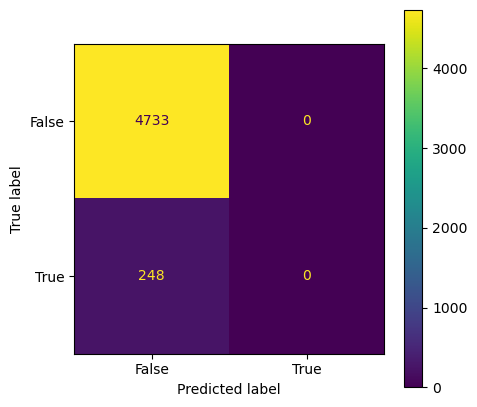

In [23]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions,zero_division=0)
Sensitivity_recall = metrics.recall_score(y_test, predictions,zero_division=0)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions,zero_division=0)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}) 
print('Confusion matrix :')
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()